## Persistent Homology

In class, we defined the *$k$th Vietoris-Rips persistence module of $X$* to consist of the following data:
- For each $r \geq 0$, we have a vector space
$$
H_k(\mathrm{VR}_r(X))
$$
- For each pair $r,s$ with $r \leq s$, we have a linear map
$$
H_k(\mathrm{VR}_r(X)) \to H_k(\mathrm{VR}_s(X))
$$
which is induced (by functoriality!) by the simplicial map $\mathrm{VR}_r(X) \to \mathrm{VR}_s(X)$ coming from the identity map on the vertex set $X$.

This structure is also referred to as the *persistent homology* of the Vietoris-Rips complex.

This is a very rich/complex way to encode information about the dataset $X$. This should lead you to the following

**Question:** How can a persistence module be used in practice?

That is, we need ways to 
- conveniently represent and visualize persistence modules, and
- compare persistence modules coming from different datasets.

## Persistence Barcodes

To address the first part of the question, here is some code which can be used to represent/visualize persistence modules.

**Remark:** From now on, we will start using more specialized software packages. If you are following along on your machine, it's possible that installation of these packages will not be as straightforward as it is for more 'mainstream' packages. Talk with me in office hours if you need some help with installation, or you can always follow along using the Binder link on the GitHub page.

We'll use a TDA package called `gudhi`. Documentation for the package is here: http://gudhi.gforge.inria.fr.

In [1]:
import gudhi as gd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from sklearn.metrics import pairwise_distances

Let's first study the dataset that we were looking at in the notebook `SimplicialComplexes`. In `gudhi`, we create the Vietoris-Rips complex using the following functions. I'm passing in some options which will only construct the $2$-skeleton of the VR complex.

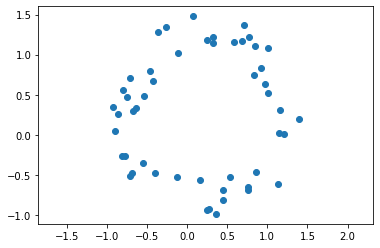

In [3]:
num_points = 50

X = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = num_points)
X = X.T/np.linalg.norm(X,axis = 1)
X = X.T + 0.5*np.random.rand(num_points,2)

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

In [4]:
D = pairwise_distances(X)
skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 2) 
Rips_complex = skeleton.create_simplex_tree(max_dimension = 2)

The VR complex is stored as a simplicial complex, together with a 'filtration' value for the simplex. This is the radius at which the simplex first appears in $\mathrm{VR}_r(X)$. 

Let's see how many simplices there are and print off the first hundred to see what the structure looks like.

In [5]:
rips_filtration = Rips_complex.get_filtration()
rips_list = list(rips_filtration)
print('Number of Simplices:',len(rips_list))
for splx in rips_list[0:100] :
    print(splx)

Number of Simplices: 14313
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
([7], 0.0)
([8], 0.0)
([9], 0.0)
([10], 0.0)
([11], 0.0)
([12], 0.0)
([13], 0.0)
([14], 0.0)
([15], 0.0)
([16], 0.0)
([17], 0.0)
([18], 0.0)
([19], 0.0)
([20], 0.0)
([21], 0.0)
([22], 0.0)
([23], 0.0)
([24], 0.0)
([25], 0.0)
([26], 0.0)
([27], 0.0)
([28], 0.0)
([29], 0.0)
([30], 0.0)
([31], 0.0)
([32], 0.0)
([33], 0.0)
([34], 0.0)
([35], 0.0)
([36], 0.0)
([37], 0.0)
([38], 0.0)
([39], 0.0)
([40], 0.0)
([41], 0.0)
([42], 0.0)
([43], 0.0)
([44], 0.0)
([45], 0.0)
([46], 0.0)
([47], 0.0)
([48], 0.0)
([49], 0.0)
([8, 39], 0.02594100990648856)
([12, 25], 0.036820513981417904)
([3, 49], 0.03836024469737955)
([23, 31], 0.04541906550240827)
([4, 42], 0.0539726535015255)
([19, 40], 0.06517654365950841)
([7, 18], 0.08202136030204495)
([7, 44], 0.08506554967694882)
([18, 44], 0.0886886655623404)
([7, 18, 44], 0.0886886655623404)
([30, 48], 0.0953093866333565)
([5, 33], 0.0984601479226759)
([8, 1

Okay... so now we have a VR complex. But what do we do with it? The following code computes the persistence module for the Vietoris-Rips complex and represents it in a particular way.

In [6]:
BarCodes = Rips_complex.persistence()

Looking at the result...

In [7]:
BarCodes

[(1, (0.5636966613367675, 1.442600359543482)),
 (1, (0.39490653240143264, 0.49687262532980303)),
 (1, (0.2166304310763277, 0.24106307640653168)),
 (1, (0.26498074939665994, 0.28522336277451044)),
 (1, (0.2858632716755691, 0.303707783205104)),
 (0, (0.0, inf)),
 (0, (0.0, 0.4080635857555154)),
 (0, (0.0, 0.364458984858025)),
 (0, (0.0, 0.3575035410575884)),
 (0, (0.0, 0.3455584835305696)),
 (0, (0.0, 0.31791770779317874)),
 (0, (0.0, 0.3164590160614717)),
 (0, (0.0, 0.312765021582281)),
 (0, (0.0, 0.28504994707332754)),
 (0, (0.0, 0.2824628190348375)),
 (0, (0.0, 0.2673225728288012)),
 (0, (0.0, 0.26261866408188567)),
 (0, (0.0, 0.2607440998485101)),
 (0, (0.0, 0.25639101744218373)),
 (0, (0.0, 0.2561064587916734)),
 (0, (0.0, 0.2527342673852108)),
 (0, (0.0, 0.23308590338399005)),
 (0, (0.0, 0.22358407690998996)),
 (0, (0.0, 0.2189044310789761)),
 (0, (0.0, 0.2096849882580079)),
 (0, (0.0, 0.19635499576831475)),
 (0, (0.0, 0.1948285044764527)),
 (0, (0.0, 0.1895574399570505)),
 (0, (0.

So it's a bunch of things of the form $(d,(x,y))$. We can plot this as a barcode diagram.

usetex mode requires TeX.


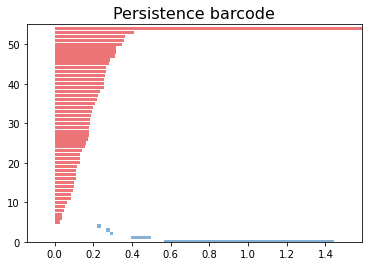

In [8]:
gd.plot_persistence_barcode(BarCodes)
plt.show()

We can ask it to print only the degree 1 barcodes.

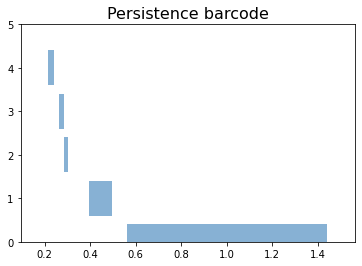

In [9]:
gd.plot_persistence_barcode([bar for bar in BarCodes if bar[0] == 1])
plt.show()

Here we see the persistent homology class in degree 1 dying off before radius $r=1.5$, as seen in the previous module.

## Another Example

Let's run this pipeline on one more example to get an intuitive feel for how it works.

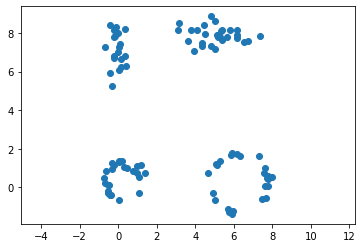

In [10]:
A = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = 25)
A = A.T/np.linalg.norm(A,axis = 1)
A = A.T + 0.5*np.random.rand(25,2)

Y = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = 25)
Y = 1.5*Y.T/np.linalg.norm(Y,axis = 1)
Y = Y.T + 0.5*np.random.rand(25,2) + [6,0]

Z1 = np.random.multivariate_normal([0,7],np.array([[0.2,0],[0,1]]),size = 20)
Z2 = np.random.multivariate_normal([5,8],np.array([[1,0],[0,0.2]]),size = 30)

X = np.concatenate((A,Y,Z1,Z2))

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

In [11]:
D = pairwise_distances(X)

In [12]:
def create_1_dim_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

In [13]:
def create_2_dim_simplicial_complex(D,r):
    
    # Create 1-skeleton
    G = create_1_dim_simplicial_complex(D,r)
    
    # Get a list of 2-simplices
    two_spx_list = []
    
    # Naive search for viable 2-simplices
    for edge in G.edges():
        for vertex in G.nodes():
            if vertex != edge[0] and vertex != edge[1] and D[edge[0],vertex] < r and D[edge[1],vertex] < r:
                two_spx_list.append([edge[0],edge[1],vertex])
                
    return G, two_spx_list

Radius 0 done...
Radius 0.25 done...
Radius 0.5 done...
Radius 0.75 done...
Radius 1 done...
Radius 1.25 done...
Radius 1.5 done...
Radius 2 done...
Radius 2.5 done...


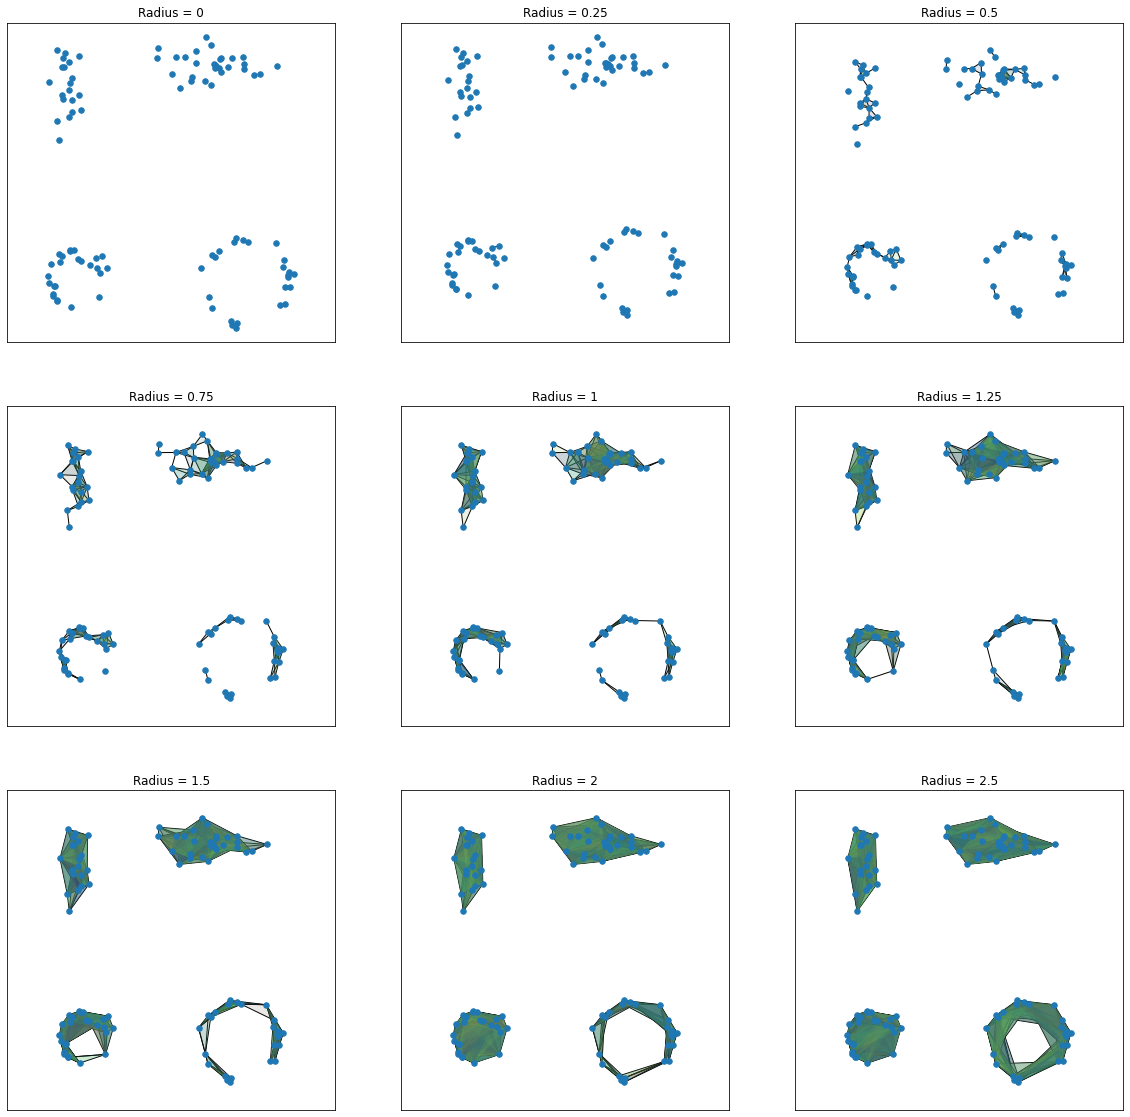

In [14]:
rs = [0,0.25,0.5,0.75,1,1.25,1.5,2,2.5]
pos = {n:X[n,:] for n in range(len(X))}

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G, two_spx_list = create_2_dim_simplicial_complex(D,r)
    patches = []

    for i,spx in enumerate(two_spx_list):
        position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
        polygon = Polygon(position_array, True)
        patches.append(polygon)
        
    ax = plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 30)
    colors = 100*np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=0.05)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    
    print('Radius',r,'done...')
    
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

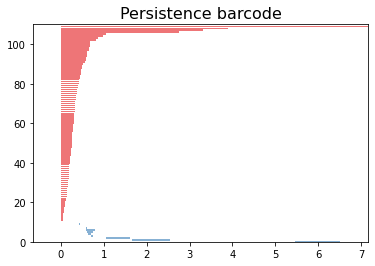

In [15]:
skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 10) 
Rips_complex = skeleton.create_simplex_tree(max_dimension = 2)
BarCodes = Rips_complex.persistence()

gd.plot_persistence_barcode(BarCodes)
plt.show()

We can ask it to only display the degree 1 barcodes, if we like.

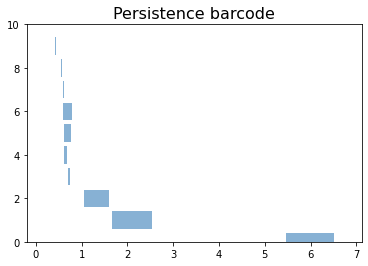

In [16]:
gd.plot_persistence_barcode([bar for bar in BarCodes if bar[0] == 1])
plt.show()